In [ ]:
#importing libraries
#importing data and necessary packages
import pandas as pd

data= pd.read_csv('/content/tennis.csv')

data.head()

,outlook,temp,humidity,windy,play
0,sunny,hot,high,False,no
1,sunny,hot,high,True,no
2,overcast,hot,high,False,yes
3,rainy,mild,high,False,yes
4,rainy,cool,normal,False,yes


In [ ]:
data.tail()

,outlook,temp,humidity,windy,play
9,rainy,mild,normal,False,yes
10,sunny,mild,normal,True,yes
11,overcast,mild,high,True,yes
12,overcast,hot,normal,False,yes
13,rainy,mild,high,True,no


In [ ]:
data

,outlook,temp,humidity,windy,play
0,sunny,hot,high,False,no
1,sunny,hot,high,True,no
2,overcast,hot,high,False,yes
3,rainy,mild,high,False,yes
4,rainy,cool,normal,False,yes
5,rainy,cool,normal,True,no
6,overcast,cool,normal,True,yes
7,sunny,mild,high,False,no
8,sunny,cool,normal,False,yes
9,rainy,mild,normal,False,yes


In [ ]:
#Summary of data
data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   outlook   14 non-null     object
 1   temp      14 non-null     object
 2   humidity  14 non-null     object
 3   windy     14 non-null     bool  
 4   play      14 non-null     object
dtypes: bool(1), object(4)
memory usage: 590.0+ bytes


In [ ]:
# Assigning features and label variables, encoded in following way: 

#weather - Overcast: 0, Rainy: 1, Sunny: 2 
#temp - Hot: 1, Mild: 2, Cool: 0
#play - Yes: 1, No: 0
#humidity - Normal: 1, High: 0
#windy - weak: 1, strong: 0

# Import LabelEncoder to Convert string labels into numbers
# Converting string labels into numbers.
from sklearn import preprocessing

le = preprocessing.LabelEncoder()

data['outlook'] = le.fit_transform(data['outlook'])
data['temp'] = le.fit_transform(data['temp'])
data['humidity'] = le.fit_transform(data['humidity'])
data['windy'] = le.fit_transform(data['windy'])
data['play'] = le.fit_transform(data['play'])

data

,outlook,temp,humidity,windy,play
0,2,1,0,0,0
1,2,1,0,1,0
2,0,1,0,0,1
3,1,2,0,0,1
4,1,0,1,0,1
5,1,0,1,1,0
6,0,0,1,1,1
7,2,2,0,0,0
8,2,0,1,0,1
9,1,2,1,0,1


In [ ]:
#spliting data into x and y dataset
x = data[['outlook','temp','humidity','windy']]
y = data['play'].values.reshape(-1,1)

In [ ]:
#import DecisionTreeClassifier from sklearn
#fitting and training the model
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(criterion = 'entropy')
model.fit(x,y)

DecisionTreeClassifier(criterion='entropy')

In [ ]:
#predicting and testing the model with the new data
new_data = [2,1,0,0]
model.predict([new_data])

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  "X does not have valid feature names, but"


array([0])

[Text(0.4, 0.9, 'X[0] <= 0.5\nentropy = 0.94\nsamples = 14\nvalue = [5, 9]'),
 Text(0.3, 0.7, 'entropy = 0.0\nsamples = 4\nvalue = [0, 4]'),
 Text(0.5, 0.7, 'X[2] <= 0.5\nentropy = 1.0\nsamples = 10\nvalue = [5, 5]'),
 Text(0.3, 0.5, 'X[0] <= 1.5\nentropy = 0.722\nsamples = 5\nvalue = [4, 1]'),
 Text(0.2, 0.3, 'X[3] <= 0.5\nentropy = 1.0\nsamples = 2\nvalue = [1, 1]'),
 Text(0.1, 0.1, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.3, 0.1, 'entropy = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.4, 0.3, 'entropy = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(0.7, 0.5, 'X[3] <= 0.5\nentropy = 0.722\nsamples = 5\nvalue = [1, 4]'),
 Text(0.6, 0.3, 'entropy = 0.0\nsamples = 3\nvalue = [0, 3]'),
 Text(0.8, 0.3, 'X[0] <= 1.5\nentropy = 1.0\nsamples = 2\nvalue = [1, 1]'),
 Text(0.7, 0.1, 'entropy = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.9, 0.1, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1]')]

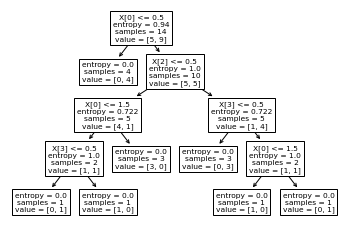

In [ ]:
#plotting tree using entropy
from sklearn import tree

tree.plot_tree(model)

In [ ]:
model_gini = DecisionTreeClassifier(criterion = 'gini')
model_gini.fit(x,y)

DecisionTreeClassifier()

In [ ]:
model_gini.predict([new_data])

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  "X does not have valid feature names, but"


array([0])

[Text(0.4, 0.9, 'X[0] <= 0.5\ngini = 0.459\nsamples = 14\nvalue = [5, 9]'),
 Text(0.3, 0.7, 'gini = 0.0\nsamples = 4\nvalue = [0, 4]'),
 Text(0.5, 0.7, 'X[2] <= 0.5\ngini = 0.5\nsamples = 10\nvalue = [5, 5]'),
 Text(0.3, 0.5, 'X[0] <= 1.5\ngini = 0.32\nsamples = 5\nvalue = [4, 1]'),
 Text(0.2, 0.3, 'X[3] <= 0.5\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(0.1, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.3, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.4, 0.3, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(0.7, 0.5, 'X[3] <= 0.5\ngini = 0.32\nsamples = 5\nvalue = [1, 4]'),
 Text(0.6, 0.3, 'gini = 0.0\nsamples = 3\nvalue = [0, 3]'),
 Text(0.8, 0.3, 'X[0] <= 1.5\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(0.7, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.9, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]')]

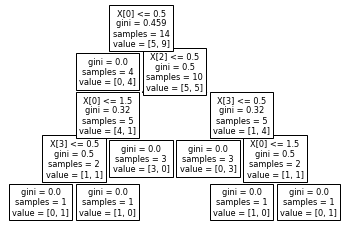

In [ ]:
#plotting tree using gini-index
tree.plot_tree(model_gini)



*   As the dataset used here is not equally distributed among the categorical values, there is need for scaling the dataset.
*   Label Encoding as a preprocessing step is required for some columns that were initially not in numerical format.

